# Reducción de dimensiones y selección de variables

---

En esta actividad, trabajaremos con el dataset `iris.csv`, y aplicaremos los conocimientos sobre tratamiento de datos para realizar exploración de datos, análisis descriptivo y selección de características.



## 1. Exploración de datos y análisis descriptivo

En esta etapa, se llevará a cabo una exploración de los datos para comprender su estructura y características. Se aplicarán técnicas como la visualización de datos y el análisis descriptivo para obtener información útil sobre el conjunto de datos Iris. Algunas de las técnicas que se pueden aplicar incluyen:

- Visualización de la distribución de las variables numéricas y categóricas.

- Cálculo de medidas de tendencia central y de dispersión para las variables numéricas.

- Identificación de valores atípicos o missing values en el conjunto de datos.

In [25]:
# Cargamos lirerías para el análisis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargamos los datos
df = pd.read_csv("iris.csv", encoding="ISO-8859-1", sep=",")

In [26]:
# Visualizamos los datos
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
# Observamos un resumen estadístico de nuestro conjunto de datos
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<h3> Significado de las variables y del resumen estadístico: </h3>

- `ID`: Identificador único para cada observación.
- `SepalLengthCm`: Longitud del sépalo en centímetros.
- `SepalWidthCm`: Ancho del sépalo en centímetros.
- `PetalLengthCm`: Longitud del pétalo en centímetros.
- `PetalWidthCm`: Ancho del pétalo en centímetros.

Las estadísticas proporcionadas para cada variable son las siguientes:

- **count**: El número total de observaciones en el conjunto de datos para cada variable.
- **mean**: La media de cada variable, es decir, el promedio de los valores.
- **std**: La desviación estándar de cada variable, que indica cuánto varían los - valores de la media.
- **min**: El valor mínimo observado para cada variable.
- **25%, 50%, 75%**: Los percentiles 25, 50 (mediana) y 75 de cada variable. Estos proporcionan información sobre la distribución de los datos.
- **max**: El valor máximo observado para cada variable.

In [28]:
# Frecuencias absolutas en intervalos

df_numeric = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

for columna in df_numeric:
  print(f"Frecuencia absoluta de {df_numeric[columna].value_counts(bins=5)}")

Frecuencia absoluta de SepalLengthCm
(5.74, 6.46]     42
(5.02, 5.74]     41
(4.295, 5.02]    32
(6.46, 7.18]     24
(7.18, 7.9]      11
Name: count, dtype: int64
Frecuencia absoluta de SepalWidthCm
(2.96, 3.44]     69
(2.48, 2.96]     46
(3.44, 3.92]     20
(1.997, 2.48]    11
(3.92, 4.4]       4
Name: count, dtype: int64
Frecuencia absoluta de PetalLengthCm
(0.993, 2.18]    50
(4.54, 5.72]     47
(3.36, 4.54]     34
(5.72, 6.9]      16
(2.18, 3.36]      3
Name: count, dtype: int64
Frecuencia absoluta de PetalWidthCm
(0.0966, 0.58]    49
(1.06, 1.54]      41
(1.54, 2.02]      29
(2.02, 2.5]       23
(0.58, 1.06]       8
Name: count, dtype: int64


In [29]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [30]:
## Un poco de Estádistica Descriptiva de los datos:
df.describe()   

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [31]:
# Verificar si hay datos faltantes

#Conteo de datos perdidos por variable y gráfica de barras de este mismo conteo
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- `Id`: Esta variable es de tipo *int64*, lo que indica que es una variable numérica de tipo entero.
- `SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, `PetalWidthCm`: Todas estas variables son de tipo *float64*, lo que indica que son variables numéricas de tipo decimal.
- `Species`: Esta variable es de tipo *object*, lo que indica que es una variable categórica o de texto.

Los **datos cuantitativos** pueden representarse con diferentes tipos de gráficos, como los gráficos de tarta, diagramas de barras y diagramas de puntos.

- **Gráfico de tarta**: Son útiles para mostrar la proporción de cada categoría en un conjunto de datos. Cada categoría se representa como una porción del pastel, donde el tamaño de cada porción corresponde a la proporción de esa categoría en el conjunto de datos.

- **Diagramas de Barras**: Son efectivos para comparar cantidades entre diferentes categorías. Cada categoría se representa con una barra, donde la altura de la barra representa la cantidad correspondiente a esa categoría.

- **Diagramas de Puntos**: En estos diagramas, los valores de una variable se representan en el eje X, mientras que en el eje Y se consideran las frecuencias absolutas o relativas en forma de puntos. Uniendo estos puntos mediante rectas, se obtiene lo que se conoce como polígono de frecuencias.

Vemos que las tres especies de Iris están equitativamente distribuidas en el conjunto de datos. Eso quiere decir que hay el mismo número de observaciones para cada especie.

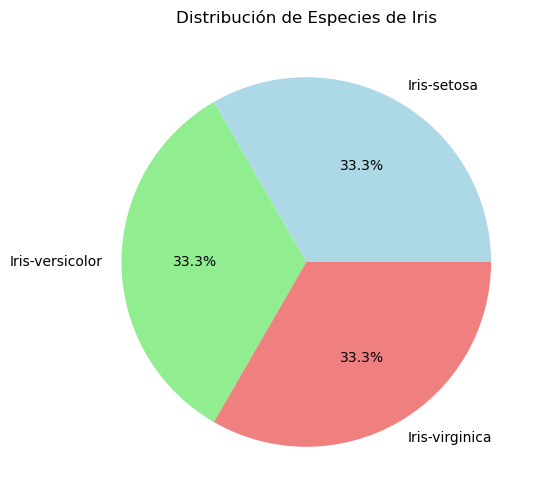

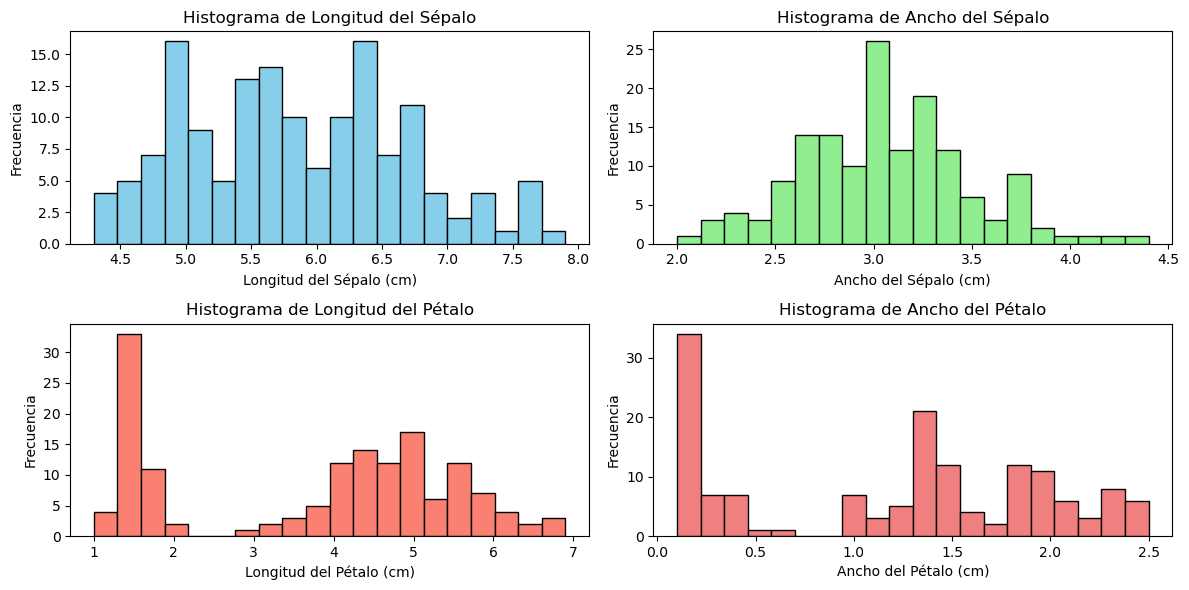

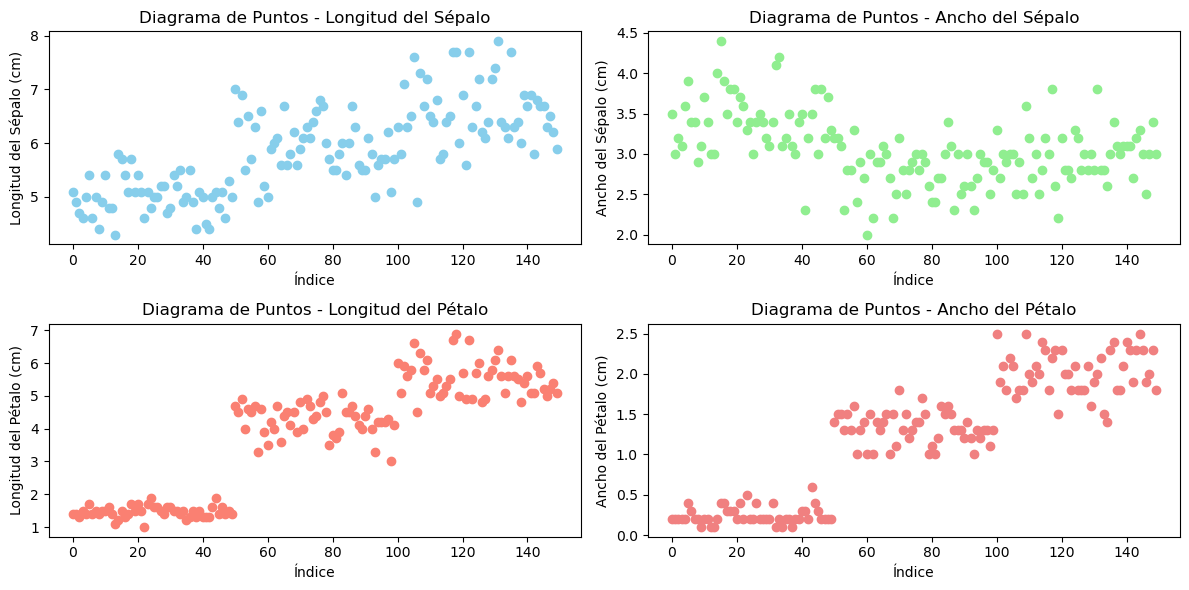

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
# Diagrama de pastel para la variable 'Species'
plt.figure(figsize=(8, 6))
df['Species'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribución de Especies de Iris')
plt.ylabel('')
plt.show()

# Diagramas de barras para las variables numéricas
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
df['SepalLengthCm'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Longitud del Sépalo')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 2)
df['SepalWidthCm'].plot(kind='hist', bins=20, color='lightgreen', edgecolor='black')
plt.title('Histograma de Ancho del Sépalo')
plt.xlabel('Ancho del Sépalo (cm)')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 3)
df['PetalLengthCm'].plot(kind='hist', bins=20, color='salmon', edgecolor='black')
plt.title('Histograma de Longitud del Pétalo')
plt.xlabel('Longitud del Pétalo (cm)')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 4)
df['PetalWidthCm'].plot(kind='hist', bins=20, color='lightcoral', edgecolor='black')
plt.title('Histograma de Ancho del Pétalo')
plt.xlabel('Ancho del Pétalo (cm)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Diagrama de puntos para las variables numéricas
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(df.index, df['SepalLengthCm'], marker='o', linestyle='None', color='skyblue')
plt.title('Diagrama de Puntos - Longitud del Sépalo')
plt.xlabel('Índice')
plt.ylabel('Longitud del Sépalo (cm)')

plt.subplot(2, 2, 2)
plt.plot(df.index, df['SepalWidthCm'], marker='o', linestyle='None', color='lightgreen')
plt.title('Diagrama de Puntos - Ancho del Sépalo')
plt.xlabel('Índice')
plt.ylabel('Ancho del Sépalo (cm)')

plt.subplot(2, 2, 3)
plt.plot(df.index, df['PetalLengthCm'], marker='o', linestyle='None', color='salmon')
plt.title('Diagrama de Puntos - Longitud del Pétalo')
plt.xlabel('Índice')
plt.ylabel('Longitud del Pétalo (cm)')

plt.subplot(2, 2, 4)
plt.plot(df.index, df['PetalWidthCm'], marker='o', linestyle='None', color='lightcoral')
plt.title('Diagrama de Puntos - Ancho del Pétalo')
plt.xlabel('Índice')
plt.ylabel('Ancho del Pétalo (cm)')

plt.tight_layout()
plt.show()


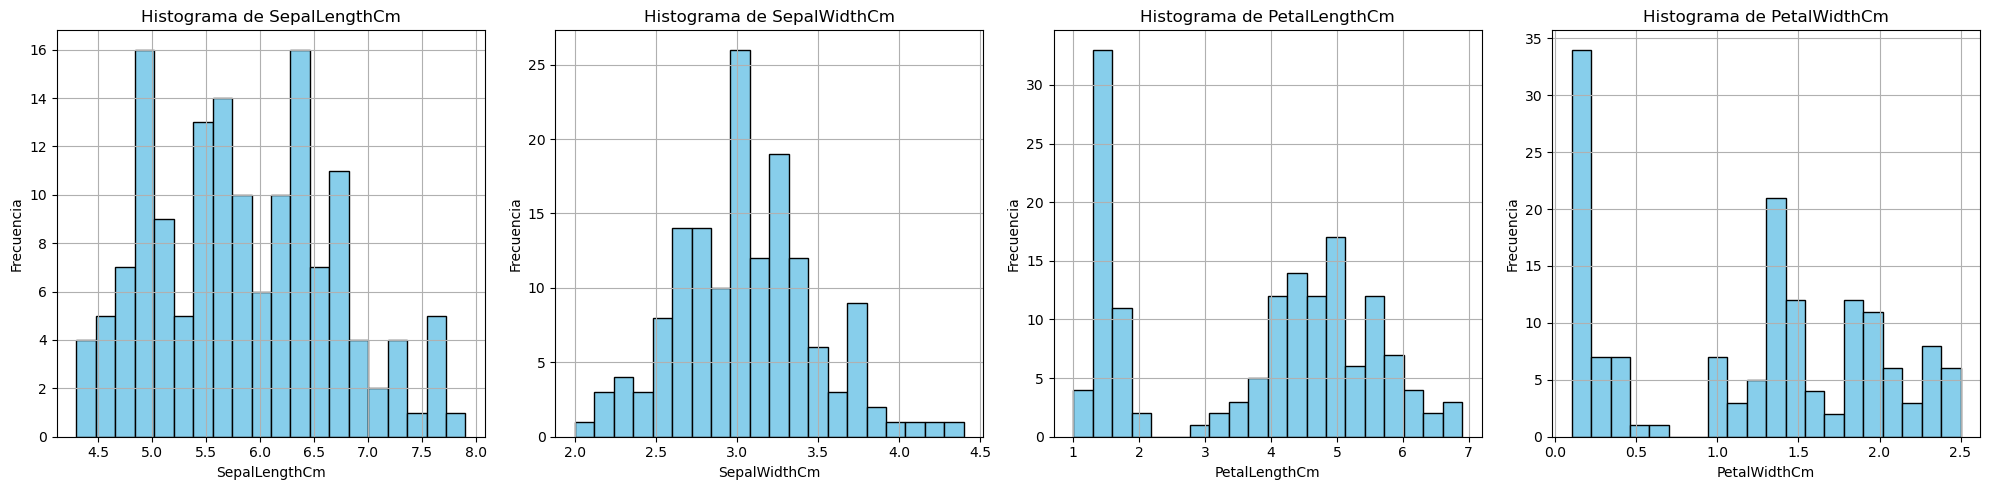

In [39]:
import matplotlib.pyplot as plt

# Seleccionar las columnas más importantes
columnas_importantes = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Crear un grid de subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 fila y 4 columnas

# Crear un histograma para cada columna
for ax, columna in zip(axes, columnas_importantes):
    ax.hist(df[columna], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histograma de {columna}')
    ax.set_xlabel(columna)
    ax.set_ylabel('Frecuencia')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [37]:
import pandas as pd

# Suponiendo que ya tienes tu DataFrame df con los datos de Iris

# Seleccionar solo las columnas numéricas más importantes
important_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
numeric_df = df[important_columns]

# Calcular medidas de tendencia central
media = numeric_df.mean()  # Calcula la media de cada columna
mediana = numeric_df.median()  # Calcula la mediana de cada columna
moda = numeric_df.mode().iloc[0]  # Calcula la moda de cada columna

# Calcular medidas de dispersión
rango = numeric_df.max() - numeric_df.min()  # Calcula el rango de cada columna
varianza = numeric_df.var()  # Calcula la varianza de cada columna
desviacion_estandar = numeric_df.std()  # Calcula la desviación estándar de cada columna

# Mostrar los resultados
print("Medidas de tendencia central:")
print("Media:")
print(media)
print("\nMediana:")
print(mediana)
print("\nModa:")
print(moda)

print("\nMedidas de dispersión:")
print("Rango:")
print(rango)
print("\nVarianza:")
print(varianza)
print("\nDesviación estándar:")
print(desviacion_estandar)

Medidas de tendencia central:
Media:
SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64

Mediana:
SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64

Moda:
SepalLengthCm    5.0
SepalWidthCm     3.0
PetalLengthCm    1.5
PetalWidthCm     0.2
Name: 0, dtype: float64

Medidas de dispersión:
Rango:
SepalLengthCm    3.6
SepalWidthCm     2.4
PetalLengthCm    5.9
PetalWidthCm     2.4
dtype: float64

Varianza:
SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
dtype: float64

Desviación estándar:
SepalLengthCm    0.828066
SepalWidthCm     0.433594
PetalLengthCm    1.764420
PetalWidthCm     0.763161
dtype: float64


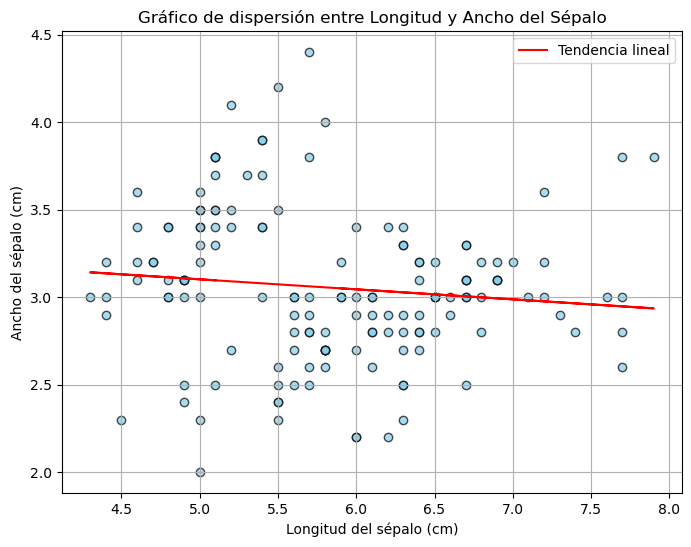

Correlación de Pearson: -0.11


In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Diagrama de dispersión entre las variables y correlación de Pearson

# Crear el scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Gráfico de dispersión entre Longitud y Ancho del Sépalo")
plt.xlabel("Longitud del sépalo (cm)")
plt.ylabel("Ancho del sépalo (cm)")

# Línea de regresión lineal (tendencia lineal)
coef = np.polyfit(df['SepalLengthCm'], df['SepalWidthCm'], 1)
plt.plot(df['SepalLengthCm'], np.polyval(coef, df['SepalLengthCm']), 'r-', label="Tendencia lineal")
plt.legend()

plt.grid(True)
plt.show()

# Correlación de Pearson
correlation = df['SepalLengthCm'].corr(df['SepalWidthCm'])
print(f"Correlación de Pearson: {correlation:.2f}")



### Interpretación del Gráfico de Dispersión

#### Gráfico de Dispersión
En el gráfico de dispersión mostrado, se presentan los datos de longitud del sépalo (`SepalLengthCm`) en el eje X y el ancho del sépalo (`SepalWidthCm`) en el eje Y. Cada punto en el gráfico representa una observación del dataset iris.csv.

#### Tendencia Lineal
Se ha añadido una línea de regresión lineal (en rojo) para ilustrar la tendencia general entre las dos variables. La pendiente negativa de esta línea sugiere una ligera correlación negativa entre la longitud y el ancho del sépalo. Es decir, en general, a medida que la longitud del sépalo aumenta, el ancho del sépalo tiende a disminuir.

#### Correlación de Pearson
El valor de la correlación de Pearson calculado es negativo y cercano a 0, lo cual confirma que la relación entre la longitud y el ancho del sépalo es muy débilmente negativa. Este coeficiente indica que, aunque existe una relación lineal entre las dos variables, esta relación no es fuerte.

#### Observaciones
- La dispersión de los puntos muestra una variabilidad considerable en los datos, lo que implica que otros factores podrían estar influyendo en las medidas del sépalo.
- La correlación negativa observada es leve, lo que sugiere que la longitud del sépalo no es un predictor fuerte del ancho del sépalo.

En resumen, aunque hay una ligera tendencia negativa entre la longitud y el ancho del sépalo, la relación no es fuerte y otros factores pueden estar afectando estas medidas. La línea de tendencia y el coeficiente de correlación de Pearson proporcionan una visión cuantitativa y visual de esta relación débil.


### Medidas de Tendencia Central y de Dispersión
Las medidas de tendencia central y de dispersión son fundamentales para comprender la distribución y variabilidad de un conjunto de datos.

#### Medidas de Tendencia Central
- **Media:** Promedio de los valores, calculado sumando todos los valores y dividiendo por el número total de observaciones.
- **Mediana:** Valor central en un conjunto de datos ordenado; si el número de observaciones es impar, es el valor medio, y si es par, el promedio de los dos valores centrales.
- **Moda:** Valor que aparece con mayor frecuencia en un conjunto de datos.

#### Medidas de Dispersión
- **Rango:** Diferencia entre el valor máximo y el valor mínimo.
- **Varianza:** Media de los cuadrados de las diferencias entre cada valor y la media, indicando cuánto varían los valores respecto a la media.
- **Desviación Estándar:** Raíz cuadrada de la varianza, proporciona una medida de la dispersión de los valores.


In [42]:
import pandas as pd

# Suponiendo que ya tienes tu DataFrame df con los datos de Iris

# Seleccionar solo las columnas numéricas más importantes
important_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
numeric_df = df[important_columns]

# Calcular medidas de tendencia central
media = numeric_df.mean()  # Calcula la media de cada columna
mediana = numeric_df.median()  # Calcula la mediana de cada columna
moda = numeric_df.mode().iloc[0]  # Calcula la moda de cada columna

# Calcular medidas de dispersión
rango = numeric_df.max() - numeric_df.min()  # Calcula el rango de cada columna
varianza = numeric_df.var()  # Calcula la varianza de cada columna
desviacion_estandar = numeric_df.std()  # Calcula la desviación estándar de cada columna

# Mostrar los resultados
print("Medidas de tendencia central:")
print("\nMedia:\n")
print(media)
print("\nMediana:\n")
print(mediana)
print("\nModa:\n")
print(moda)

print("\nMedidas de dispersión:\n")
print("\nRango:\n")
print(rango)
print("\nVarianza:\n")
print(varianza)
print("\nDesviación estándar:\n")
print(desviacion_estandar)


Medidas de tendencia central:

Media:

SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64

Mediana:

SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64

Moda:

SepalLengthCm    5.0
SepalWidthCm     3.0
PetalLengthCm    1.5
PetalWidthCm     0.2
Name: 0, dtype: float64

Medidas de dispersión:


Rango:

SepalLengthCm    3.6
SepalWidthCm     2.4
PetalLengthCm    5.9
PetalWidthCm     2.4
dtype: float64

Varianza:

SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
dtype: float64

Desviación estándar:

SepalLengthCm    0.828066
SepalWidthCm     0.433594
PetalLengthCm    1.764420
PetalWidthCm     0.763161
dtype: float64


<h3> Medidas de Tendencia Central </h3>

Media:

Representa el valor promedio de cada característica en el conjunto de datos.
- **SepalLengthCm:** aproximadamente 5.84 cm
- **SepalWidthCm:** aproximadamente 3.05 cm
- **PetalLengthCm:** aproximadamente 3.76 cm
- **PetalWidthCm:** aproximadamente 1.20 cm

Mediana:

Valor que se encuentra en el medio de la distribución de cada característica, cuando los datos están ordenados de menor a mayor.
- **SepalLengthCm:** 5.80 cm
- **SepalWidthCm:** 3.00 cm
- **PetalLengthCm:** 4.35 cm
- **PetalWidthCm:** 1.30 cm

Moda:

Valor que aparece con mayor frecuencia en la distribución de cada característica.
- **SepalLengthCm:** 5.0 cm
- **SepalWidthCm:** 3.0 cm
- **PetalLengthCm:** 1.5 cm
- **PetalWidthCm:** 0.2 cm

<h3> Medidas de Dispersión </h3>

Rango:

Diferencia entre el valor máximo y el valor mínimo de cada característica.
- **SepalLengthCm:** 3.6 cm
- **SepalWidthCm:** 2.4 cm
- **PetalLengthCm:** 5.9 cm
- **PetalWidthCm:** 2.4 cm

Varianza:

Mide la dispersión de los datos con respecto a la media.
- **SepalLengthCm:** aproximadamente 0.69
- **SepalWidthCm:** aproximadamente 0.19
- **PetalLengthCm:** aproximadamente 3.11
- **PetalWidthCm:** aproximadamente 0.58


Desviación Estándar:

Raíz cuadrada de la varianza y proporciona una medida de dispersión más interpretable en la misma unidad que los datos originales.
- **SepalLengthCm:** aproximadamente 0.83 cm
- **SepalWidthCm:** aproximadamente 0.43 cm
- **PetalLengthCm:** aproximadamente 1.76 cm
- **PetalWidthCm:** aproximadamente 0.76 cm


La diferencia entre la media y moda de la variable `PetalLenghtCm` puede indicar que hay presencia de valores atípicos en sus observaciones. Además, la variabilidad que presenta `PetalLenghtCm` es superor a las otras, pues tiene el mayor valor de rango intercuartílico, mayor varianza y mayor desviación estándar.

Por otro lado, la variable `SepalWidthCm` es la que menos variabilidad presenta en sus observaciones, de acuerdo a los cálculos previamente obtenidos.

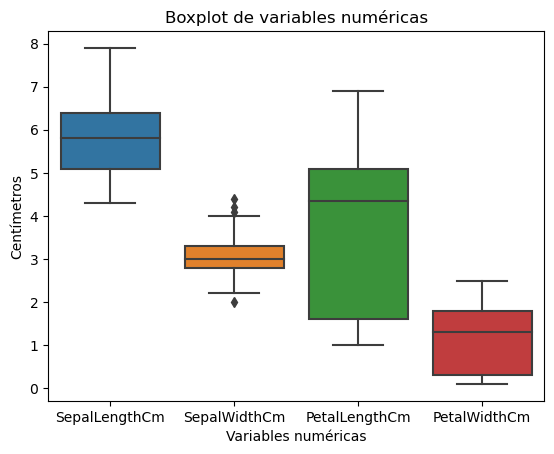

In [43]:
# Diagrama de caja y bigotes
sns.boxplot(df_numeric)
plt.title("Boxplot de variables numéricas")
plt.xlabel("Variables numéricas")
plt.ylabel("Centímetros")
plt.show()

El diagrama de caja y bigotes nos permite apreciar visualmente las diferencias de las medidas estadísticas entre las variables de nuestro conjunto de datos.

Atendiendo a la gráfica, podemos observar que `PetalWidthCm` presenta las medidas en centímetros más pequeñas, pues su máximo apenas llega a alcanzar los 3 centímetros. Esto quiere decir que el **ancho de los pétalos de las flores recogidas en este conjunto de datos es muy pequeño** en comparación con las demás características de las flores.

En cuanto a `PetalLengthCm`, llega a alcanzar prácticamente los 7 cm, y el rango de medidas en esta variable es muy amplio. **Podemos encontrar flores con pétalos tanto muy largos como muy cortos**. Esto explica la variabilidad que obtuvimos en cálculos previos.

`SepalWidthCm` **presenta varios valores atípicos** que afectan a la media, mientras que **el 50% de los valores se concentran alrededor de los 3 cm**. El máximo valor alcanzado dentro del rango intercuartílico son los 4cm, aunque hay varias flores cuyo sépalo alcanza valores superiores a ese, nunca llegando a alcanzar los 5 cm. Encontramos también un valor atípico por debajo del cuartil 1, con un ancho de sépalo que no alcanza los 2 cm.

El largo del sépalo, `SepalLengthCm`, es el que presenta los valores en centímetros más elevados de su rango intercuartílico. El máximo observado casi llega a alcanzar los 8 cm, mientras que el mínimo no llega a rozar los 4.5 cm.

## 2. Normalización de Datos

In [44]:
# Importamos StandardScaler para la normalización
from sklearn.preprocessing import StandardScaler

# Almacenamos la función
scaler = StandardScaler()

# Calcula y almacena la media y la desviación estándar de cada columna
scaler.fit(df_numeric)

# Almacenamos el dataframe con las columnas estandarizadas
df_normalizado = pd.DataFrame(scaler.transform(df_numeric))
df_normalizado

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


## Ahora que ya tenemos los datos numéricos normalizados, vamos a unificarlos con el df original.

In [24]:
# Almacenamos las variables numéricas
variables_num = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Las sustituímos por las estandarizadas en el dataframe original
df[variables_num] = df_normalizado
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,2,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,3,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,4,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,5,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...,...
145,146,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,147,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,148,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,149,0.432165,0.800654,0.933356,1.447956,Iris-virginica


Normalizar los datos con StandardScaler() implica ajustar sus valores para que cada característica tenga una media de 0 y una desviación estándar de 1.

Esto significa que los valores normalizados se centran en torno a 0, con la mayoría de los datos distribuidos entre -1 y 1. Valores normalizados cercanos a 0 indican que están cerca de la media original, mientras que valores cercanos a -1 o 1 indican que están a una desviación estándar de la media original.

Esto mejora la eficacia y eficiencia de los algoritmos de machine learning al asegurarse de que todas las características contribuyan de manera equitativa.

## 3. Reducción de Dimensiones

En esta etapa, se utilizará la técnica de Análisis de Componentes Principales (PCA) sobre los datos normalizados. El PCA es una técnica de reducción de dimensiones que permite disminuir la cantidad de características en un conjunto de datos mientras se conserva la mayor cantidad posible de su variabilidad. 

- Se analizará cada uno de los componentes principales obtenidos y se comentarán los resultados.

Además, se realizará un diagrama de dispersión de los datos originales y los datos reducidos utilizando PCA. Esto permitirá visualizar la relación entre los datos antes y después de la reducción de dimensiones, y comparar los resultados obtenidos.

*Criterio 3:* Reduce las dimensiones aplicando la técnica de PCA y comenta los resultados de manera apropiada, analizando cada uno de los componentes principales.

Estos criterios ayudarán a evaluar la calidad y la adecuación del análisis realizado en cada etapa del trabajo.


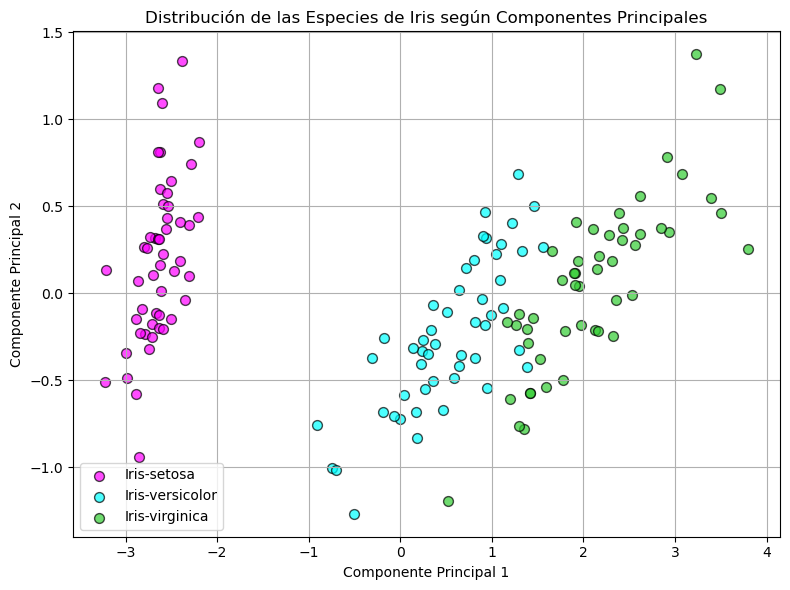

In [18]:
import matplotlib.pyplot as plt  # Importar la biblioteca de trazado de gráficos
from sklearn.decomposition import PCA  # Importar la clase PCA para la reducción de dimensionalidad
from sklearn.datasets import load_iris  # Importar la función para cargar el conjunto de datos Iris
import numpy as np  # Importar la biblioteca NumPy para el manejo de matrices

# Cargar el conjunto de datos Iris
iris = load_iris()  # Cargar el conjunto de datos Iris
X = iris.data  # Asignar las características de las flores a la variable X
y = iris.target  # Asignar las etiquetas de las especies a la variable y

# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)  # Crear una instancia de PCA para reducir a 2 componentes principales
Y = pca.fit_transform(X)  # Ajustar PCA a los datos y transformarlos

# Mapear los valores de y a los nombres de las especies
species = np.array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])  # Definir los nombres de las especies
y = species[y]  # Convertir las etiquetas numéricas en nombres de especies

# Generar el gráfico de dispersión con los dos componentes principales
plt.figure(figsize=(8, 6))  # Crear una figura de tamaño 8x6 pulgadas
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),  # Iterar sobre las especies y sus colores
                    ('magenta', 'cyan', 'limegreen')):  # Colores para cada especie
    plt.scatter(
        Y[y==lab, 0],  # Coordenada X: primer componente principal
        Y[y==lab, 1],  # Coordenada Y: segundo componente principal
        label=lab,  # Etiqueta para la leyenda
        c=col,  # Color de los puntos
        s=50,  # Tamaño de los puntos
        alpha=0.7,  # Transparencia de los puntos
        edgecolors='k'  # Borde negro para los puntos
    )

plt.title('Distribución de las Especies de Iris según Componentes Principales')  # Título del gráfico
plt.xlabel('Componente Principal 1')  # Etiqueta del eje X
plt.ylabel('Componente Principal 2')  # Etiqueta del eje Y
plt.legend(loc='best')  # Mostrar la leyenda en la mejor ubicación
plt.grid(True)  # Mostrar la cuadrícula
plt.tight_layout()  # Ajustar el diseño para que se vea bien
plt.show()  # Mostrar el gráfico


### Diagrama de dispersión de los datos originales y los datos reducidos:

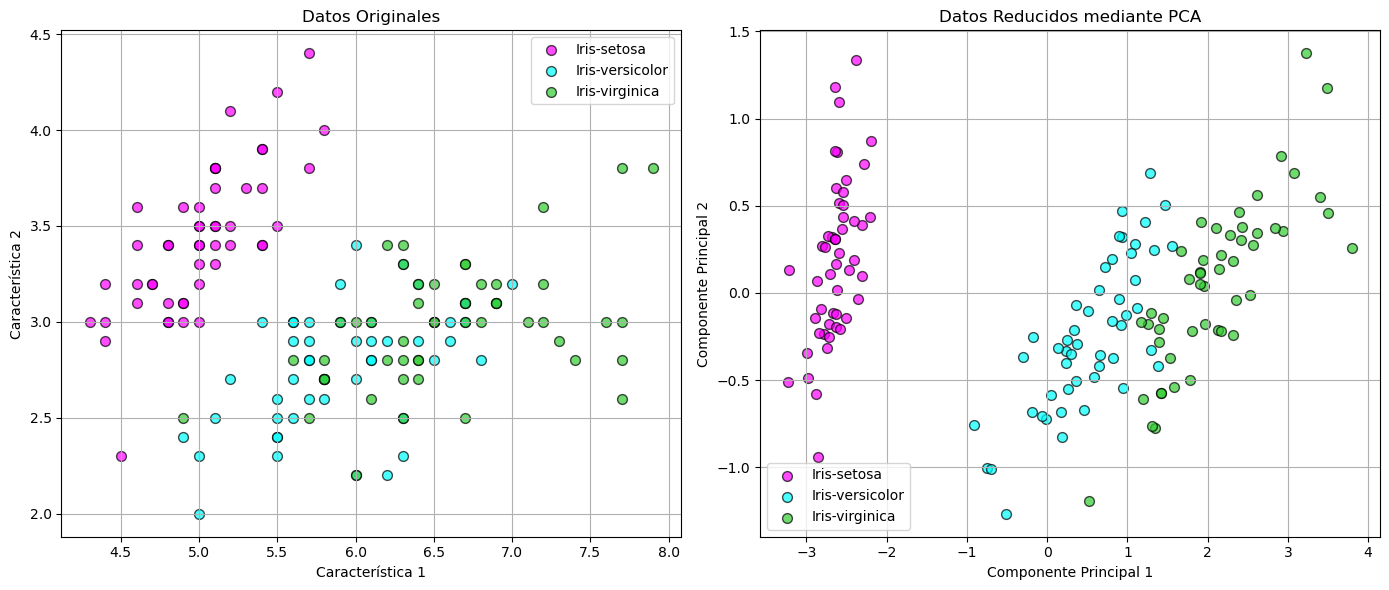

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import numpy as np

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Mapear los valores de y a los nombres de las especies
species = np.array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
y_names = species[y]

# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear un gráfico de dispersión de los datos originales
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                    ('magenta', 'cyan', 'limegreen')):
    plt.scatter(
        X[y_names == lab, 0],  # Primera característica original
        X[y_names == lab, 1],  # Segunda característica original
        label=lab,
        c=col,
        s=50,  # Tamaño de los puntos
        alpha=0.7,  # Transparencia de los puntos
        edgecolors='k'  # Borde negro para los puntos
    )
plt.title('Datos Originales')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend(loc='best')
plt.grid(True)

# Crear un gráfico de dispersión de los datos reducidos mediante PCA
plt.subplot(1, 2, 2)
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                    ('magenta', 'cyan', 'limegreen')):
    plt.scatter(
        X_pca[y_names == lab, 0],  # Primer componente principal
        X_pca[y_names == lab, 1],  # Segundo componente principal
        label=lab,
        c=col,
        s=50,  # Tamaño de los puntos
        alpha=0.7,  # Transparencia de los puntos
        edgecolors='k'  # Borde negro para los puntos
    )
plt.title('Datos Reducidos mediante PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()


# Conclusiones

A partir del gráfico de dispersión que muestra la distribución de las tres especies de Iris (Iris-setosa, Iris-versicolor e Iris-virginica) utilizando sus dos componentes principales, podemos sacar las siguientes conclusiones:

## Separación clara de Iris-setosa

**Iris-setosa** (puntos magenta) está claramente separada de las otras dos especies. Sus características son lo suficientemente distintas para ser diferenciadas utilizando los dos primeros componentes principales.

## Superposición parcial de Iris-versicolor e Iris-virginica

**Iris-versicolor** (puntos cian) y **Iris-virginica** (puntos verde lima) tienen una mayor superposición en el espacio de los componentes principales. Aunque hay alguna separación, no es tan clara como la de Iris-setosa. Esto sugiere que las características de Iris-versicolor e Iris-virginica son más similares entre sí, lo que dificulta su clasificación utilizando solo estos componentes.

## Eficacia de PCA para reducción de dimensionalidad

El Análisis de Componentes Principales (PCA) ha sido efectivo para reducir la dimensionalidad a dos componentes principales, manteniendo una clara separación para al menos una especie. Esto facilita la visualización y análisis sin perder mucha información.

## Potencial para clasificación

La separación observada sugiere que un algoritmo de clasificación podría clasificar eficazmente Iris-setosa. Sin embargo, se podrían necesitar características adicionales o técnicas más avanzadas para mejorar la clasificación entre Iris-versicolor e Iris-virginica.

## Resumen

En resumen, Iris-setosa se puede separar claramente de las otras dos especies mediante PCA. Iris-versicolor e Iris-virginica tienen una mayor superposición y podrían requerir un análisis más detallado o el uso de componentes adicionales para una separación más efectiva.

